In [3]:
from scipy.constants import mu_0, epsilon_0
import numpy as np

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [87]:
def HEDfun(sigma, r, frequency, mu = mu_0, epsilon = epsilon_0):
    omega = 2*np.pi*frequency    
    k = np.sqrt(-1j*omega*mu + omega**2*mu*epsilon)
#     k = np.sqrt(-1j*omega*mu)    
    Ex = 1./(2*np.pi*sigma*r**3)*(1+(1+1j*k*r)*np.exp(-1j*k*r))
    Exp = 1./(np.pi*sigma*r**3)
    return Ex, Exp

In [88]:
from simpegem1d import EM1DAnal

In [89]:
sigmacole = EM1DAnal.ColeCole(frequency, sig_inf=sigma, eta=0.05)

In [95]:
frequency = np.logspace(-3, 5)
sigma = 1e-3
r = 20.

In [96]:
Ex, Exp = HEDfun(sigma, r, frequency)

In [97]:
phaseEx = np.angle(Ex, deg=True)
phaseIP = np.angle(1./sigmacole, deg=True)

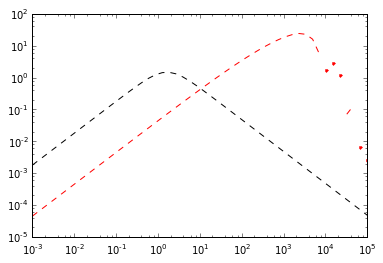

In [98]:
plt.loglog(frequency, phaseEx, 'r.')
plt.loglog(frequency, -phaseEx, 'r--')
plt.loglog(frequency, -phaseIP, 'k--')